### This notebook explores the result from myANHA configuration with tmask applied at trcsms_my_trc.

In [13]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy,os,glob
import pylab as pl
import matplotlib.animation as animation
import types
from matplotlib import gridspec
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [14]:
nc_filename=sorted(glob.glob('*ANHA*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

ptrc=nc.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

found *.nc file: 
['ANHA4tmask_1m_20020101_20020702_ptrc_T.nc']


###  Take a look at the maximum 

In [15]:
print TR_7.max(),TR_8.max(),TR_9.max(),TR_10.max()

0.4391 0.988 0.0443311 0.24828


In [16]:
data=TR_8
a=np.where(data==data.max())
print a

(array([5]), array([45]), array([623]), array([305]))


### Set up a function to plot vertical profiles for 4 tracers

In [17]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry']
mesh=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/mesh_mask_rm1Canada.nc')
gdept=mesh.variables['gdept'][:]
gdepw=mesh.variables['gdepw'][:]

import matplotlib.cm as cm
def vetical(data,dep,string,ylim='False',a=[[],[],[700],[195]]):
    #a=np.where(data==data.max())
    #print a
    
    for i in range (len(data[:,1,1,1])):
        cc=cm.Spectral(i*50)
        plt.plot(data[i,:,a[2][0],a[3][0]],gdept[0,:,a[2][0],a[3][0]],color=cc,linewidth=1,label='T:%s'%i)
        plt.legend(loc=0)

    for k in range (len(dep)):
        plt.axhline(gdept[0,k,a[2][0],a[3][0]],c="green",linestyle='-.',linewidth=0.5,alpha=0.9)
        plt.hold(True)
        plt.axhline(gdepw[0,k,a[2][0],a[3][0]],c="blue",linestyle='-',linewidth=0.5,alpha=0.5)
    plt.axhline(bathy[a[2][0],a[3][0]],c="grey",linewidth=1,alpha=0.2)
    plt.ylabel('depth (m)')
    plt.xlabel('%s Conc.'%string)
    
    if ylim=='True':
        dmin=bathy[a[2][0],a[3][0]]-1000
        dmax=bathy[a[2][0],a[3][0]]+500
    plt.ylim([dmin,dmax])
              
    print ('deepest:%s m'%bathy[a[2][0],a[3][0]])

deepest:2728.74 m
deepest:2728.74 m
deepest:2728.74 m
deepest:2728.74 m


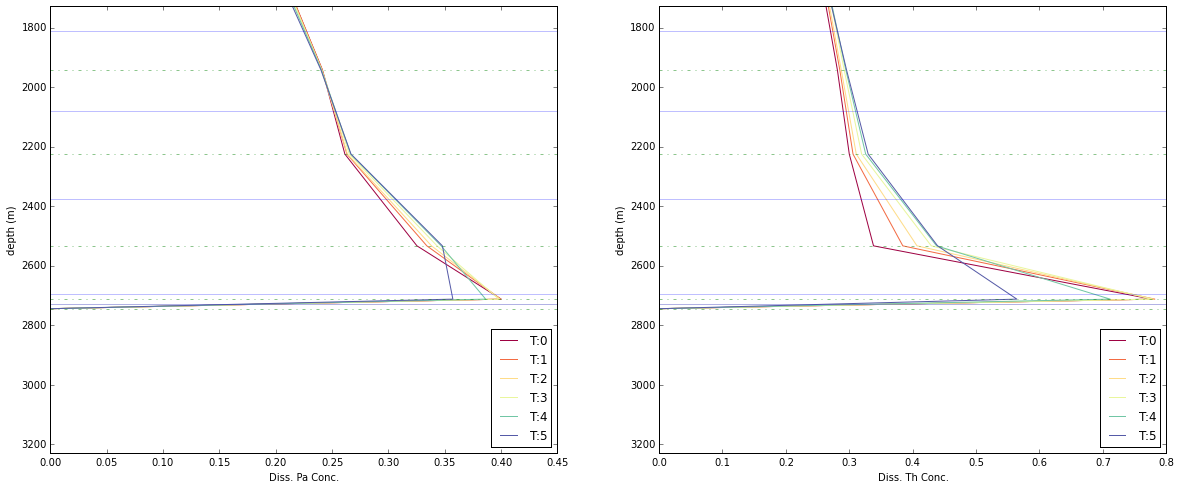

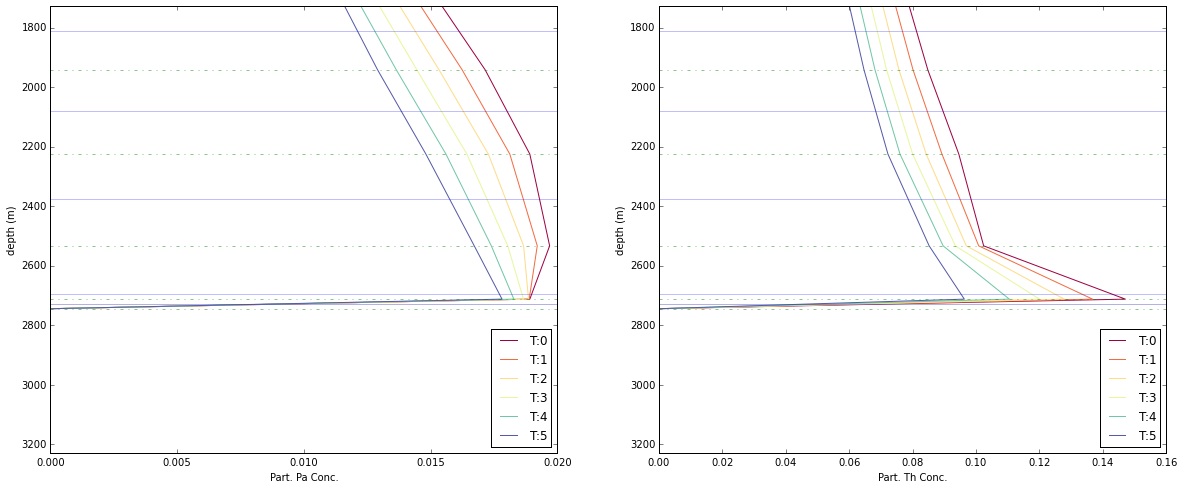

In [18]:
fig = plt.figure(figsize=(20,8))
plt.subplot(121);vetical(TR_7,dep,'Diss. Pa','True',a=[[],[],[678],[318]]);plt.gca().invert_yaxis() 
plt.subplot(122);vetical(TR_8,dep,'Diss. Th','True',a=[[],[],[678],[318]]);plt.gca().invert_yaxis()

fig = plt.figure(figsize=(20,8))
plt.subplot(121);vetical(TR_9,dep,'Part. Pa','True',a=[[],[],[678],[318]]);plt.gca().invert_yaxis()
plt.subplot(122);vetical(TR_10,dep,'Part. Th','True',a=[[],[],[678],[318]]);plt.gca().invert_yaxis()

plt.show()

deepest:3670.59 m
deepest:3670.59 m
deepest:3670.59 m
deepest:3670.59 m


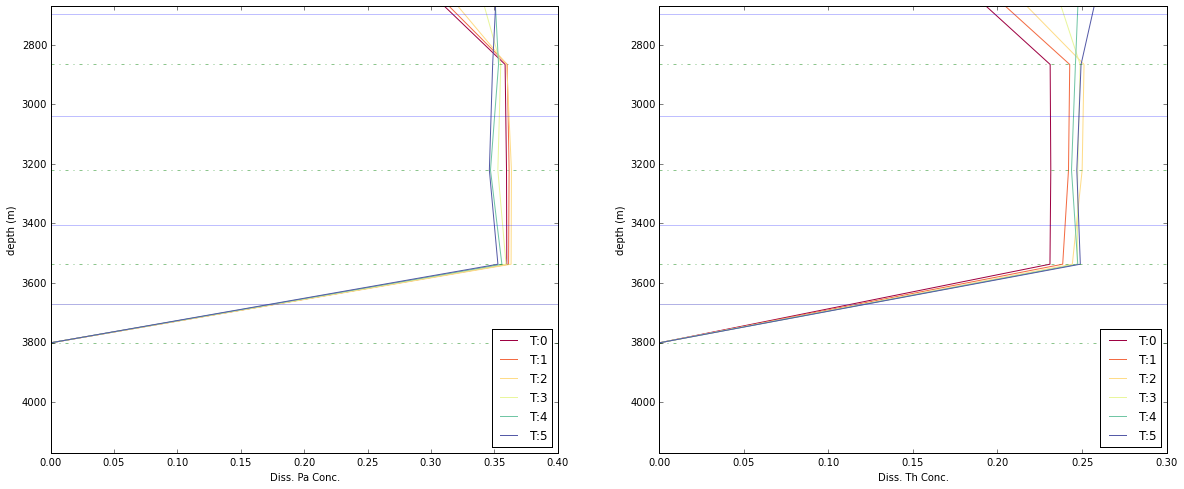

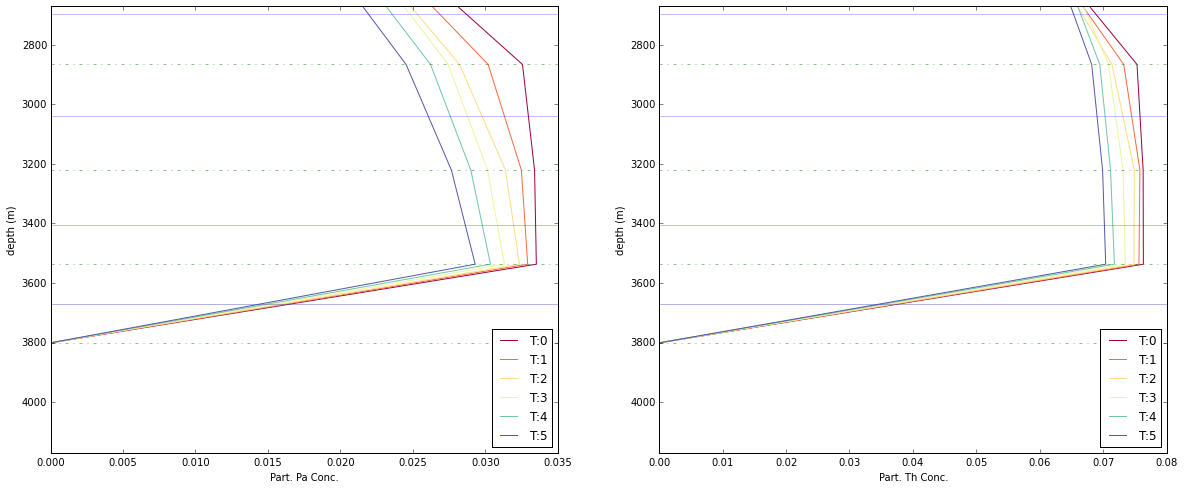

In [19]:
fig = plt.figure(figsize=(20,8))
plt.subplot(121);vetical(TR_7,dep,'Diss. Pa','True');plt.gca().invert_yaxis() 
plt.subplot(122);vetical(TR_8,dep,'Diss. Th','True');plt.gca().invert_yaxis()

fig = plt.figure(figsize=(20,8))
plt.subplot(121);vetical(TR_9,dep,'Part. Pa','True');plt.gca().invert_yaxis()
plt.subplot(122);vetical(TR_10,dep,'Part. Th','True');plt.gca().invert_yaxis()

plt.show()

### look at the tracer again from a top view

(6, 800, 544)
0


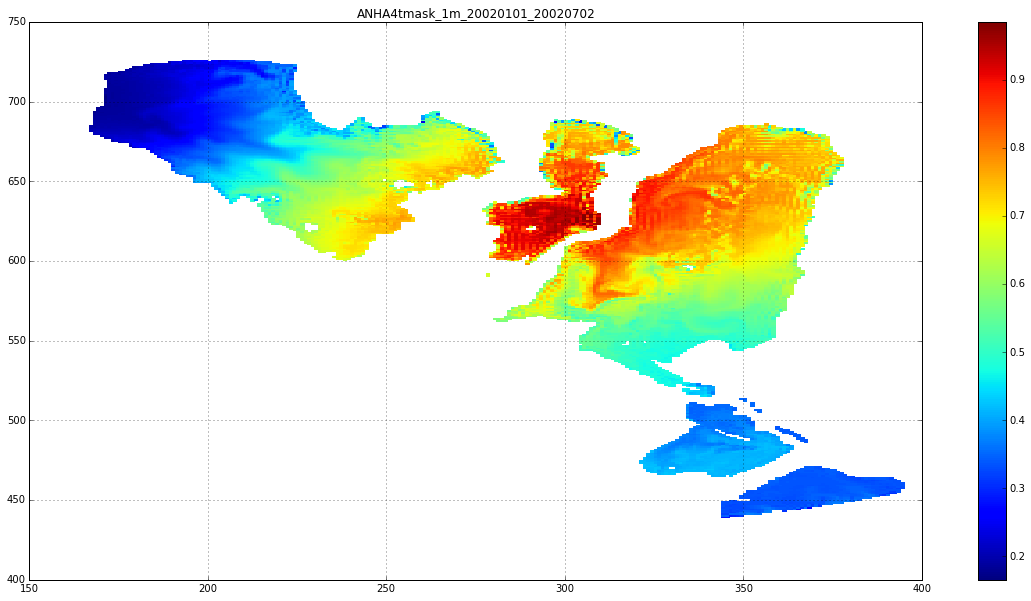

In [51]:
fig = plt.figure(figsize=(20,10))
for k in range (len(nc_filename)):
    ptrc=nc.Dataset(nc_filename[k])
    TR_7=ptrc.variables['TR_8'][:,42,:,:]#[:,:,::10,:10]
    TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
    TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
    print TR_7.shape

    ii=[]
    jj=[]
    timestep=-1
    for i in range (len(TR_7[0,:,0])):
        for j in range (len(TR_7[0,0,:])):
            if TR_7[timestep,i,j]>1:
                ii.append(i)
                jj.append(j)
    
    ax = fig.add_subplot(1,len(nc_filename),k+1)
    plt.pcolor(TR_7[timestep,:,:])
    plt.colorbar()
    print len(jj)
    plt.scatter(jj,ii,color='grey',s=10)
    plt.title('%s'%nc_filename[k][0:-10])
    plt.grid(True)
    plt.xlim([150,400])
    plt.ylim([400,750])
plt.show()

### Outputs from previous runs (layer 42, same layer as the plot above). 
* Figures below show that after removing the bathy, huge value no longer show up. However, the value become incredibly low at the places that used to gain high values.  

previous run with bad point bathy removed. variable: TR_7


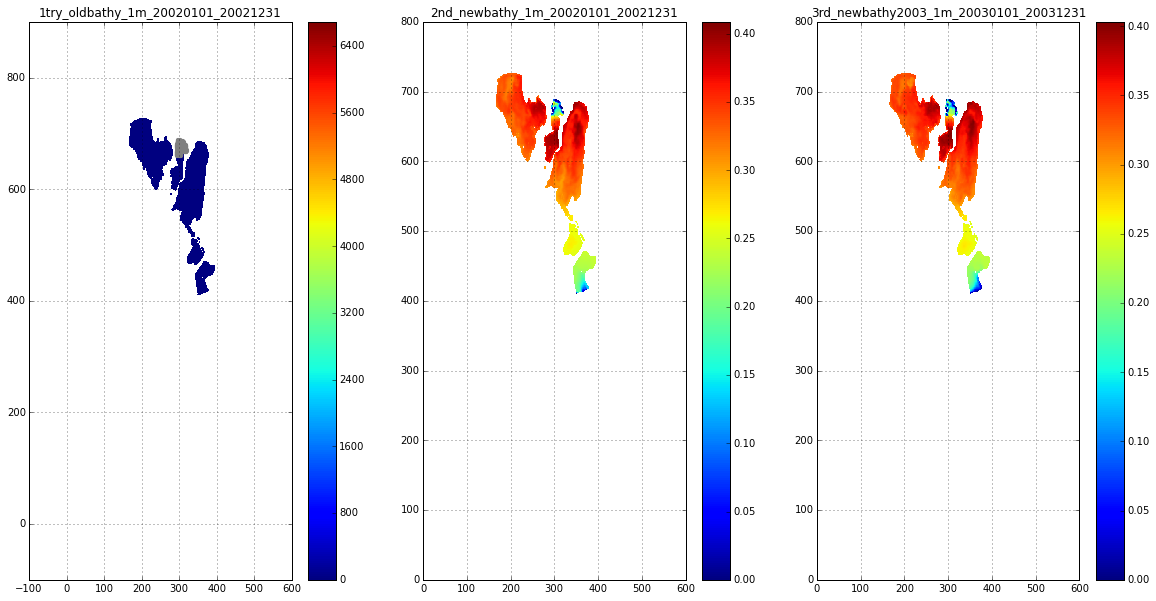

In [60]:
from IPython.display import Image
print 'previous run with bad point bathy removed. variable: TR_7'
Image(filename='/home/xiaoxiny/Desktop/badpoints_location.png',width='100%') 

### The next two cells displasy outputs from previous runs but in different layer (layer 44). 
* Again, figures below show that after removing the bathy, huge value no longer show up. However, the value become incredibly low at the places that used to gain high values.  **And the value of TR_7/TR_8 became high at those spots.**

previous run with bad point bathy removed. variable: TR_7


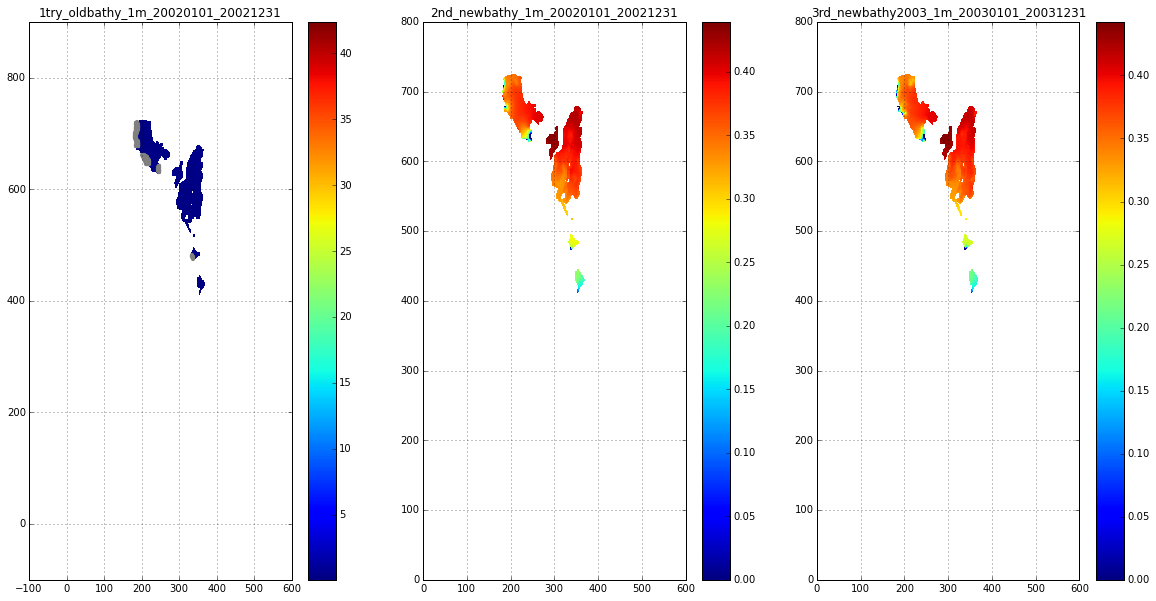

In [66]:
print 'previous run with bad point bathy removed. variable: TR_7'
Image(filename='/home/xiaoxiny/Desktop/badpoints_location_TR7_l44.png',width='100%')

previous run with bad point bathy removed. variable: TR_7/TR_8


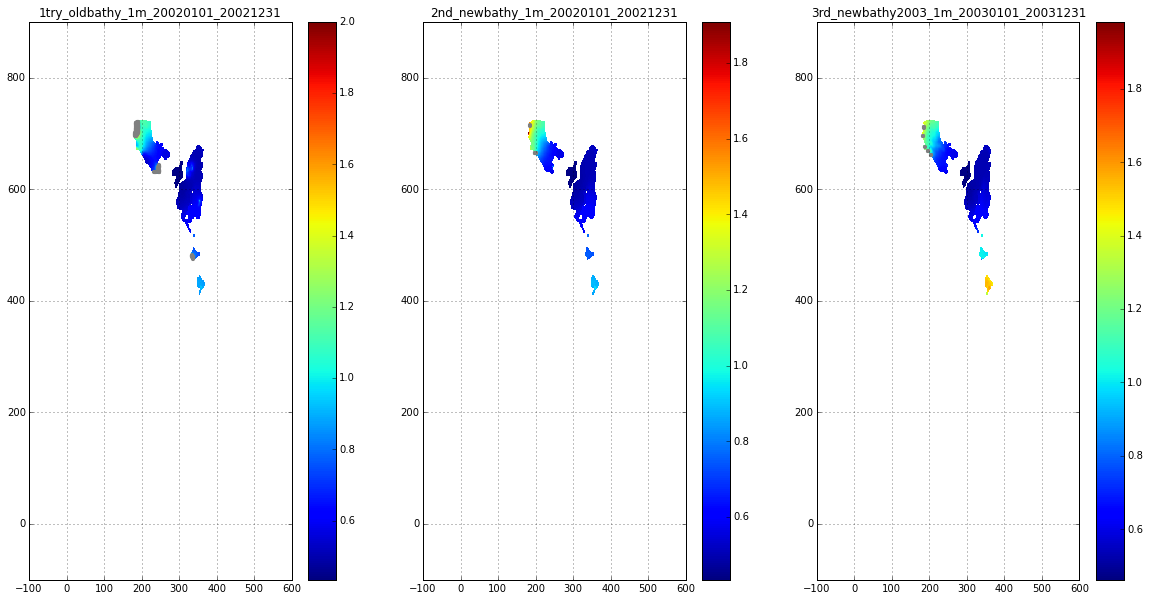

In [67]:
print 'previous run with bad point bathy removed. variable: TR_7/TR_8'
Image(filename='/home/xiaoxiny/Desktop/badpoints_location_TR78_l44.png',width='100%') 

###  Take a look at the imaginary ice for Th.

* pattern looks okay to me.

(6, 800, 544)


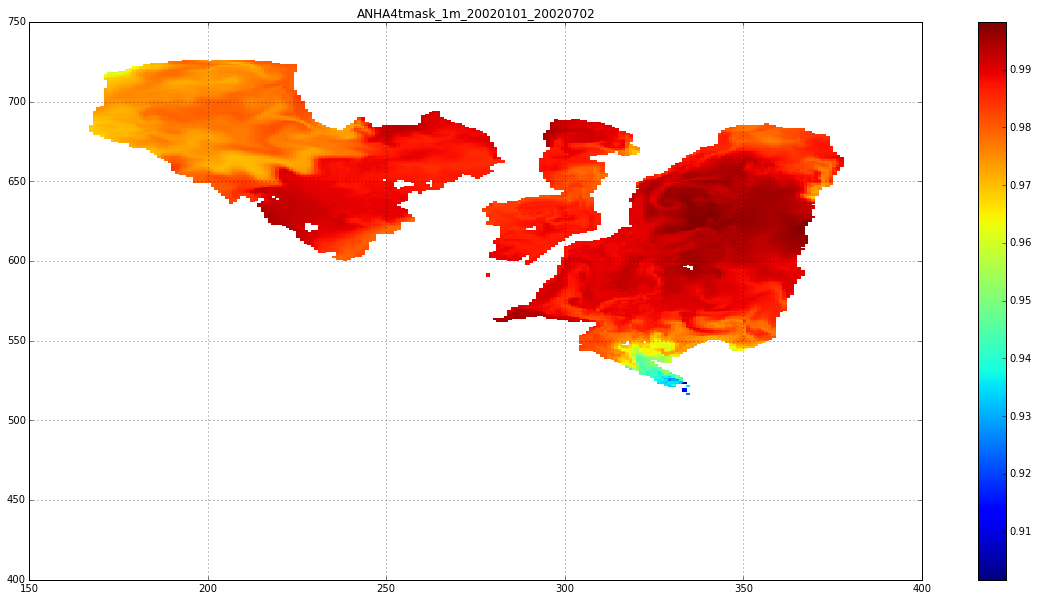

In [65]:
fig = plt.figure(figsize=(20,10))
for k in range (len(nc_filename)):
    ptrc=nc.Dataset(nc_filename[k])
    TR_7=ptrc.variables['TR_12'][:,42,:,:]#[:,:,::10,:10]
    TR_7=np.ma.masked_where(TR_7<= 0.9, TR_7)
    TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
    print TR_7.shape

    timestep=-1

    ax = fig.add_subplot(1,len(nc_filename),k+1)
    plt.pcolor(TR_7[timestep,:,:])
    plt.colorbar()
    plt.scatter(jj,ii,color='grey',s=10)
    plt.title('%s'%nc_filename[k][0:-10])
    plt.grid(True)
    plt.xlim([150,400])
    plt.ylim([400,750])
plt.show()

### below contains the output plotted with land and shows the time evolution. 

Those infomation is not useful in solving the bottom problem though.

In [22]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
%matplotlib inline

ptrc=nc.Dataset(nc_filename[0])
print("found *.nc file: \n{}".format(nc_filename[0]))
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

found *.nc file: 
ANHA4tmask_1m_20020101_20020702_ptrc_T.nc


In [35]:
def make_map(width =3345532*1,height =950905*3,lon_0=-160, lat_0=75,
             projection='stere', resolution='i', figsize=(6, 6), inset=True):
    
    m = Basemap(width=width,height=height,lon_0=lon_0, lat_0=lat_0,
                projection=projection, resolution=resolution)
    fig, ax = plt.subplots(figsize=figsize)

    m.drawcoastlines()
    m.fillcontinents(color='0.85')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,30.),labels=[0, 0, 0, 1])
    m.ax = ax

    if inset:
        axin = inset_axes(m.ax, width="30%", height="30%", loc=4)
        # Global inset map.
        #inmap = Basemap(projection='ortho', lon_0=0, lat_0=65,
        #                ax=axin, anchor='NE')
        inmap = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l',ax=axin,round='True')
        inmap.fillcontinents(color='gray')
        inmap.drawcountries(color='white')
        #inmap.drawcoastlines()
        bx, by = inmap(m.boundarylons, m.boundarylats)
        xy = list(zip(bx, by))
        mapboundary = Polygon(xy, edgecolor='k', linewidth=1, fill=False)
        inmap.ax.add_patch(mapboundary)
    return fig, m,inmap

def seperate_plot(data,string):
    data=np.ma.masked_where(data<=0,data)
    cdata=np.ma.copy(data)
    ddata=np.ma.copy(data)
    cdata[:,280:-1]=np.ma.masked
    cdata[:520,:]=np.ma.masked
    ddata[:,0:280]=np.ma.masked
    ddata[:520,:]=np.ma.masked
    
    
    fig, m,inmap = make_map(width =3345532*1*2.5/3,height =950905*2.5, figsize=(10, 5))
    x,y=inmap(lon,lat)
    inmap.contourf(x,y,data)#,vmin=cdata.min(),vmax=cdata.max())
    x,y=m(lon,lat)
    cs=m.contourf(x,y,cdata)
    m.colorbar(cs,location='right',pad="2%")
    #plt.plot(x[::5,::5],y[::5,::5],x.T[::5,::5],y.T[::5,::5],color='k',linewidth=0.1)
    plt.title('%s'%string);plt.show()

    fig, m,inmap = make_map(lon_0=0, lat_0=85,figsize=(10, 5))
    x,y=inmap(lon,lat)
    inmap.contourf(x,y,data)#,vmin=ddata.min(),vmax=ddata.max())
    x,y=m(lon,lat)
    cs=m.contourf(x,y,ddata)
    m.colorbar(cs,location='right',pad="2%")
    #plt.plot(x[::6,::6],y[::6,::6],x.T[::6,::6],y.T[::6,::6],color='k',linewidth=0.1)
    plt.title('%s'%string);plt.show()

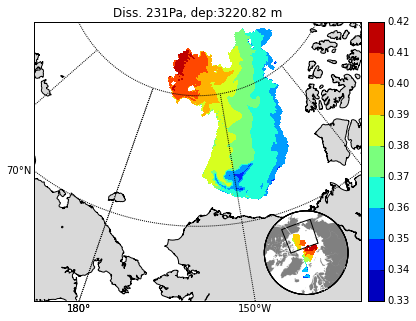

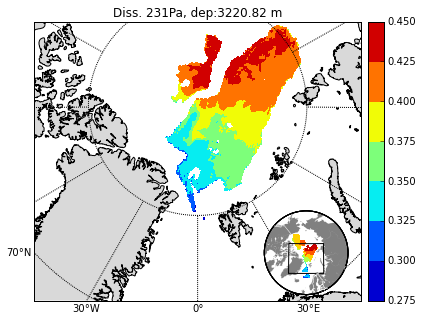

In [44]:
layer=43
data=TR_7[-1,layer,:,:]#/TR_8[-1,43,:,:]
seperate_plot(data,'Diss. 231Pa, dep:%s m'%dep[layer])

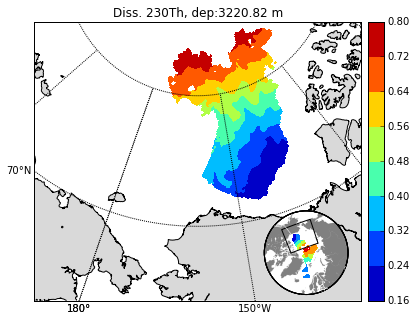

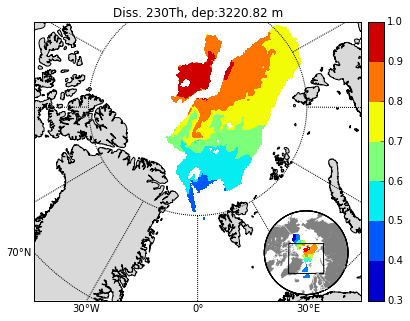

In [45]:
data=TR_8[-1,layer,:,:]
seperate_plot(data,'Diss. 230Th, dep:%s m'%dep[layer])

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in less_equal


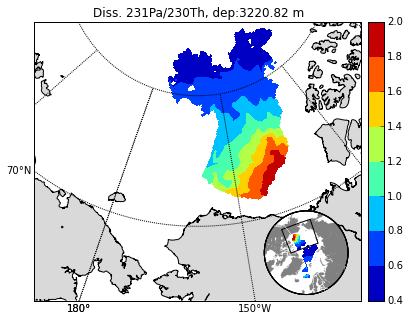

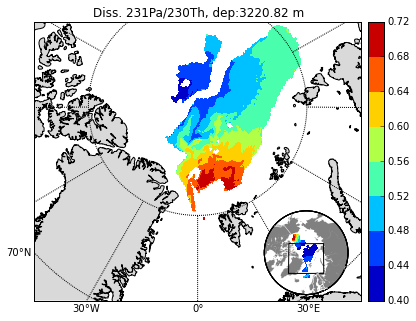

In [46]:
data=TR_7[-1,layer,:,:]/TR_8[-1,layer,:,:]
seperate_plot(data,'Diss. 231Pa/230Th, dep:%s m'%dep[layer])

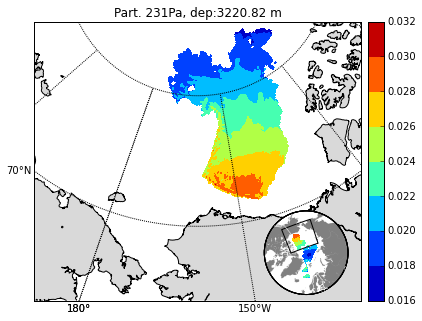

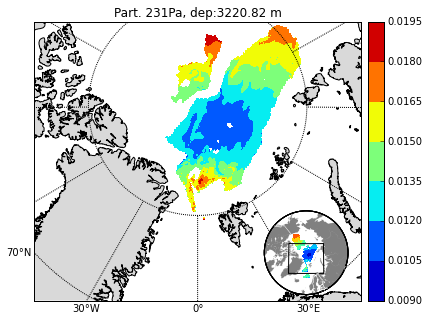

In [47]:
data=TR_9[-1,layer,:,:]#/TR_8[-1,43,:,:]
seperate_plot(data,'Part. 231Pa, dep:%s m'%dep[layer])

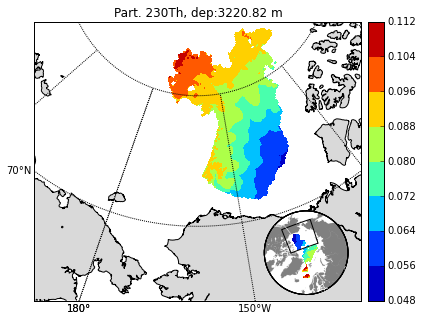

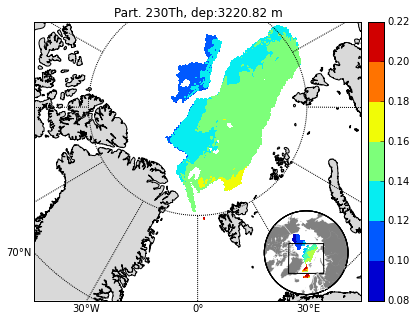

In [48]:
data=TR_10[-1,layer,:,:]
seperate_plot(data,'Part. 230Th, dep:%s m'%dep[layer])

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in less_equal


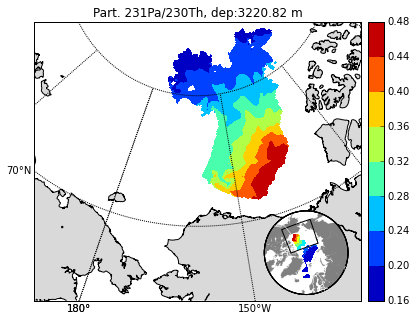

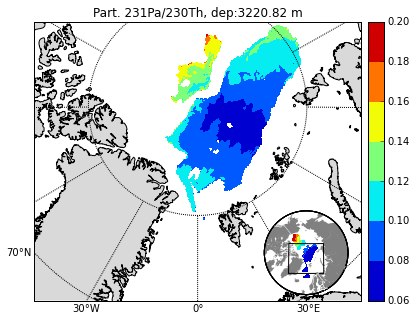

In [49]:
data=TR_9[-1,layer,:,:]/TR_10[-1,layer,:,:]
seperate_plot(data,'Part. 231Pa/230Th, dep:%s m'%dep[layer])

In [20]:
def tracer_evolution(ptrc,j,string,name):
    
    if string =='Pa':
        diss=ptrc.variables['TR_7'][:]
        part=ptrc.variables['TR_9'][:]
    else:
        diss=ptrc.variables['TR_8'][:]
        part=ptrc.variables['TR_10'][:]
    diss=np.ma.masked_where(diss<=0,diss)
    part=np.ma.masked_where(part<=0,part)
    
    fig = plt.figure(figsize=(20,10))
    gs = gridspec.GridSpec(3, 3)
    ax = fig.add_subplot(gs[0:2,0])
    m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
    m.scatter(x_lon[x,y],y_lat[x,y],color=c,s=40)
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

    ax = fig.add_subplot(gs[0,1])
    i=j[0]
    for loc in range (len(x)):
        plt.plot(diss[:,i,x[loc],y[loc]],color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[0],dep[i])))
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.title(name[0])
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(gs[0,2])      
    for loc in range (len(x)):
            plt.plot(part[:,i,x[loc],y[loc]],color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[1],dep[i])))
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.title(name[1])
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(gs[1,1])
    i=j[1]
    for loc in range (len(x)):
            plt.plot(diss[:,i,x[loc],y[loc]],color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[0],dep[i])))
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(gs[1,2])
    for loc in range (len(x)):
            plt.plot(part[:,i,x[loc],y[loc]],color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[1],dep[i])))
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(gs[2,1])
    i=j[2]
    for loc in range (len(x)):
            plt.plot(diss[:,i,x[loc],y[loc]],color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[0],dep[i])))
    plt.xlabel('Time step')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(gs[2,2])
    for loc in range (len(x)):
            plt.plot(part[:,i,x[loc],y[loc]],color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[1],dep[i])))
    plt.xlabel('Time step')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.legend(loc=0,fontsize=11)
    plt.show()

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


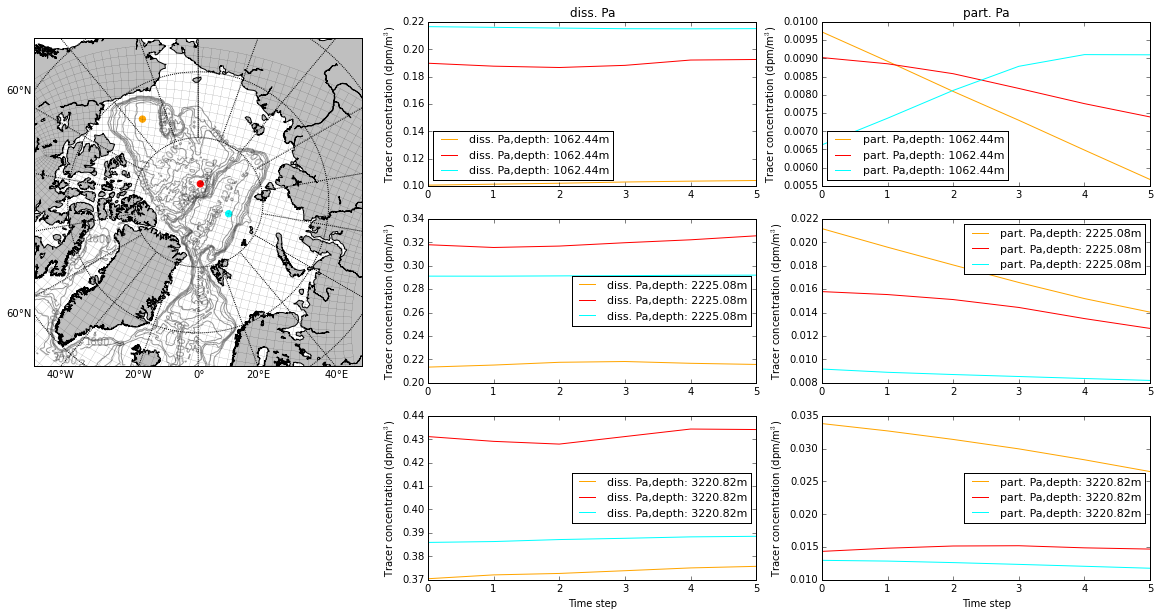

In [21]:
x=[700,630,600]
y=[200,300,350]
c=['orange','red','cyan']
ptrc=nc.Dataset(nc_filename[0])
tracer_evolution(ptrc,j=[35,40,43],string='Pa',name=['diss. Pa','part. Pa'])

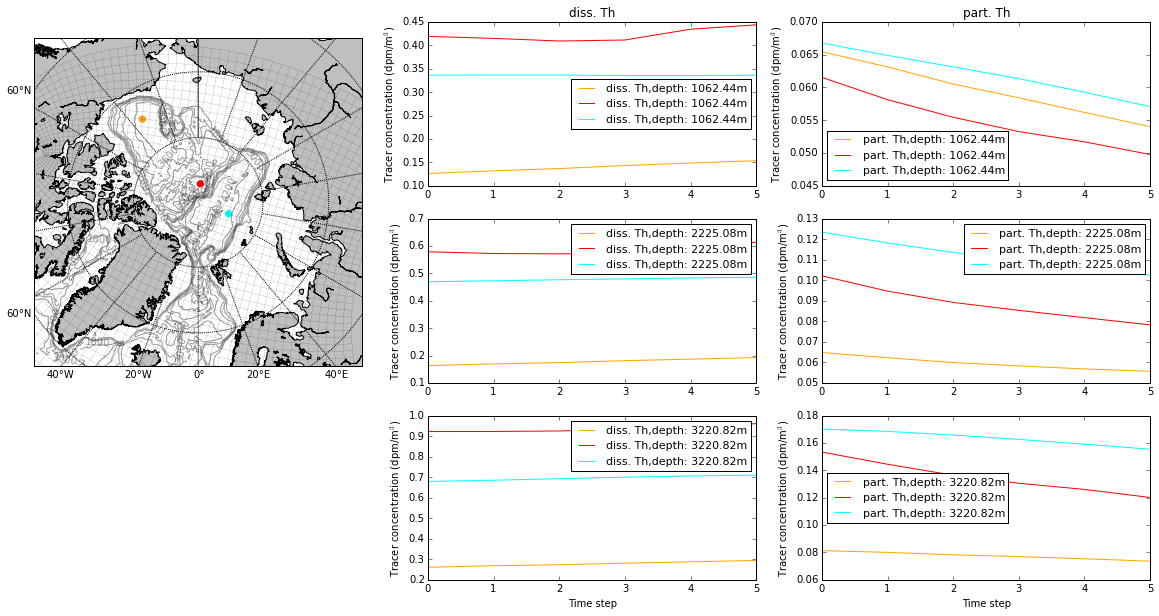

In [22]:
tracer_evolution(ptrc,j=[35,40,43],string='Th',name=['diss. Th','part. Th'])